# Introduction to Ordinary Linear Regression

-----

When you explore a data set, there are basic steps that should be followed. First, explore the data to be sure that missing values are properly handled, dates and times are encoded correctly, and that other strange artifacts are not present. Once the data has been cleaned, the next step is to compute descriptive statistics for the relevant features in the data, and to ensure they appear correct. Finally, joint distributions of different pairs of data should be visually explored to infer potential correlations. These steps can be summarized by the following relation:
- Clean
- Describe
- Visualize

Once these steps are done, the next step is to model any potential correlations. In this notebook, we introduce the simplest modeling technique, **ordinary least squares**, or **ordinary linear regression**, which constructs a simple model, such as $y = mx + b$ from a data set. This model builds on assumptions, such as the features are linearly independent and any errors in the regression are normally distributed, to build a model from the independent variables (i.e., $x$) for the dependent variable ($y$). In some application areas, the independent variables are known as the predictors, while the dependent variable is known as the response variable. If only one feature is used ($x$), the technique is known as simple linear regression, while if more than one feature is used ($x_1, x_2, ..., x_n$), the technique is known as multiple linear regression. In this notebook we will focus solely on simple linear regression.

Once a model has been built, it can be used for a variety of purposes, including prediction of new responses, understanding possible causation, or derivation of new physical laws and relationships. In the case of prediction, the application of the model over the range spanned by the dependent variables, which is sometimes called the support (i.e., $x_{min} \leq x \leq x_{max}$) is known as interpolation, while the application of the model outside this support is known as extrapolation. In general, extrapolation should be approached with extreme care, since the model has no basis for being correct in any regime where there was no support during its construction.

Before proceeding with an exploration of a demonstration data set, we first perform our standard module import.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

# Use default white plot style
sns.set(style="white")

-----

To demonstrate ordinary linear regression, we will use a classic data set known as [Anscombe's quartet][waq]. This data set is included with the Seaborn module, making it easy to analyze. To begin, we load this data into our notebook, and select only the first data set in the quartet. This data has already been cleaned, and we display the first several rows to verify this. As a result, the first step in our analysis process, _clean_, is complete.

-----
[waq]: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [2]:
# Load data
adf = sns.load_dataset("anscombe")

# Select only the first data set
adfi = adf[adf.dataset == 'I']

# Display first few rows
adfi.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


----

Our next step is to compute basic, descriptive statistics for the features in this data set. To accomplish this, we can use the `describe` function on our Pandas DataFrame. This indicates our data seem well distributed, with reasonable mean and standard deviation when compared to the minimum and maximum values of each feature. We also see that we only have eleven instances, making this a small data set.

-----

In [3]:
adfi.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


----

Our next step is to calculate more complex descriptive statistics, including correlation measures and the covariance matrix. These can be calculated by converting the two features to NumPy arrays and using the correlation measurement functions `pearsonr` and `spearmanr` from the SciPy stats module and the `cov` function in the NumPy module. This is demonstrated in the following code cell, where the `pearsonr` function indicates that there is a fairly strong correlation between our two features.

-----

In [4]:
import scipy.stats as st

# First extact the x & y columns as numpy arrays
x = adfi.x.as_matrix()
y = adfi.y.as_matrix()

# Compute Correlations
pr = st.pearsonr(x, y)
sr = st.spearmanr(x, y)

print(f'Pearsonr correlation for x,y = {pr[0]:5.3f}')
print(f'Spearmanr correlation for x,y = {sr[0]:5.3f}')

print('\nCovariance Matrix = \n', np.cov(x, y))

print('\nCorrelation Matrix = \n', np.corrcoef(x, y))

Pearsonr correlation for x,y = 0.816
Spearmanr correlation for x,y = 0.818

Covariance Matrix = 
 [[ 11.           5.501     ]
 [  5.501        4.12726909]]

Correlation Matrix = 
 [[ 1.          0.81642052]
 [ 0.81642052  1.        ]]


----

Given the strong correlation value, it seems reasonable to expect that we can construct a linear model between these two features. Before proceeding, however, we must employ the third step in our data exploration process, _visualize_. To perform this step, we use the [`regplot`][srp] from the Seaborn module to quickly display a scatter plot between the `x` and `y` features. 

-----
[srp]: http://seaborn.pydata.org/generated/seaborn.regplot.html

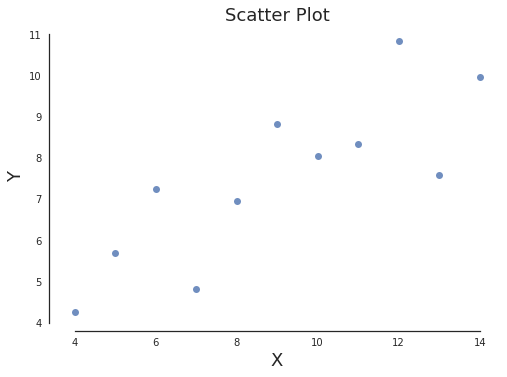

In [5]:
# Plot the data as a Scatter Plot by using regplot
ax = sns.regplot(x='x', y='y', data=adfi, fit_reg=False)

# Decorate the plot
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_title('Scatter Plot', fontsize=18)

sns.despine(offset = 5, trim=True)

----

As expected from the correlation measure, there appears to be a strong positive correlation between these two features. We can easily over-plot the best fit, linear model by setting the `fit_reg` parameter to `True`. By setting this parameter, Seaborn computes an ordinary linear regression to the data, and displays the best fit model and associated confidence interval, which corresponds to the errors on our model parameters. This model is displayed below. If we use this model to predict new values of $y$ over the range $4 \leq x \leq 14$, we are interpolating, and if we predict outside this range, we would be extrapolating.

-----

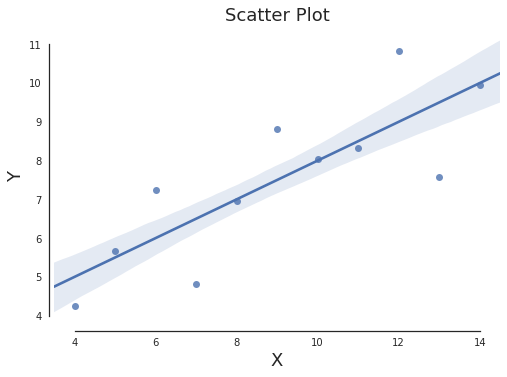

In [6]:
# Plot the data as a Regression Plot
ax = sns.regplot(x='x', y='y', data=adfi, fit_reg=True, ci=68)

# Decorate Plot
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_title('Scatter Plot', fontsize=18)

sns.despine(offset = 5, trim=True)

----

We can plot the residuals (or errors between our model and the training features) to see if the _normal_ assumption for our errors seems reasonable. This plot can be made by using the [`residplot`][srp] in the Seaborn module. Ideally, we would see no (or very little) structure in the residual plot. Otherwise, our errors would indicate either a bad fit, or that our basic assumptions were incorrect and a different (and likely more powerful) model building technique would be needed.

-----
[srp]: http://seaborn.pydata.org/generated/seaborn.residplot.html

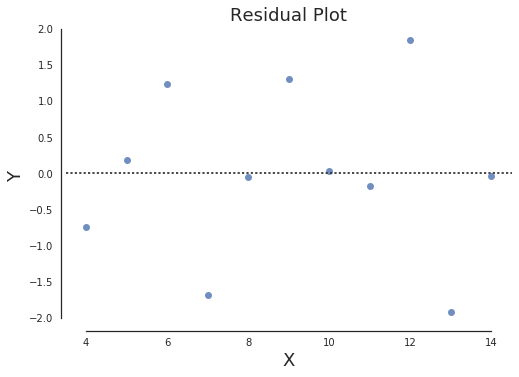

In [7]:
# Plot residuals
ax = sns.residplot(x='x', y='y', data=adfi)

# Decorate Plot
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_title('Residual Plot', fontsize=18)

sns.despine(offset = 5, trim=True)

-----

In this residual plot, we see that the residuals are generically spread about the x-axis, which is a good sign. Thus, our assumptions seemed to be met and we can proceed with a more detailed exploration of these data.

-----

### Quick Data Exploration

If a data set has already been cleaned, we can quickly create a visual summary of the data, the best fit linear regression, and the Pearson's r correlation coefficient value all at once by using the [`jointplot`][sj] function (for joint probability plot) from the Seaborn module. In the following code cell, we use this function to plot the first data set from Anscombe's quartet. We specify that the Pearson's r value should be computed by setting the `stat_func` parameter appropriately, and we indicate that a regression line should be drawn by setting the `kind` attribute to `reg`. Finally, we specify the format for how the Pearson's r value should be displayed via the `annot_kws` parameter, which includes a string format template, identification of the stat variable to include, and a location for the value to be displayed within the plot.

Finally, one additional benefit of using the `jointplot` is the inclusion of the marginal distributions along each axis. These are seen below in the histograms at the top and right side of the regression plot. In this case we only have eleven data points, thus the marginal distributions are simple, but in general they can provide additional insight into the distribution of the data. In addition, since we indicated a regression should be applied to the data (via the `kind` parameter), the marginal distributions also have been modeled.

-----
[sj]: http://seaborn.pydata.org/generated/seaborn.jointplot.html

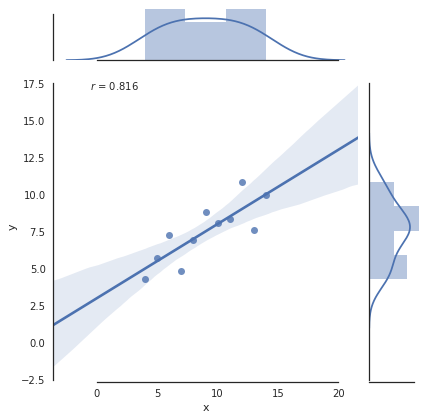

In [8]:
# Create a joint probability plot, with regression line
# and marginal distributions
sns.jointplot(x='x', y='y', data=adfi, 
              stat_func=st.pearsonr, kind='reg',
              annot_kws=dict(template='{stat} = {val:4.3f}', 
                             stat='$r$', loc = 2))

# Decorate Plot
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_title('Residual Plot', fontsize=18)

# Clean plot
sns.despine(trim=True)

-----

## Anscombe's Quartet

The data set that we have been analyzing so far in this notebook is just one of the four contained in Anscombe's quartet. As before, the first step in examining new data sets involves looking at the raw data. We can do this for our DataFrame holding the Anscombe's quartet by first grouping the data by the `dataset` column, and displaying the first three rows for each group (we limit to three for space reasons, you can of course display all eleven rows from each set in the data).

-----

In [9]:
# Group data by dataset column, and display first three rows from each group
adf.groupby(adf.dataset).head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
33,IV,8.0,6.58


-----

Overall, the data appear to be similar. Thus, our next step is to compute basic statistics summaries. To accomplish this, we once again group the DataFrame by the `dataset` column, and apply aggregate functions to determine the count, mean, and standard deviation for each variable for each data set. 

-----

In [10]:
# Group by data set, and compute aggregate statistical functions
adf.groupby(adf.dataset).aggregate(['count', 'mean', 'std'])

x                    y                    
        count mean       std count      mean       std
dataset                                               
I          11  9.0  3.316625    11  7.500909  2.031568
II         11  9.0  3.316625    11  7.500909  2.031657
III        11  9.0  3.316625    11  7.500000  2.030424
IV         11  9.0  3.316625    11  7.500909  2.030579

-----

In this case, we see that each data set has identical values for each of these descriptive statistics. This indicates that there is something odd about this quartet, but to fully understand what is going on, we must visually inspect the data. To do this easily, we use the `lmplot` function (for linear model plot) from the Seaborn module to plot all four data sets in a $2 \times 2$ array. We do this by indicating that the `col` attribute, which controls which data set is plotted within each column, is determined by the `dataset` feature in our `adf` DataFrame. We also indicate that we only want two columns, by specifying `col_wrap=2`, which causes the plot to create a new row after two subplots.

Furthermore, we set the `hue` parameter to `dataset` so that each plot has a different color, fit and over-plot a best fit regression line by setting the `fit_reg` parameter to `True`, and specify several plotting parameters to control the size and transparency of the marks that represent each instance in the DataFrame.

In the end, while each data set in Anscombe's quartet have the same descriptive statistics, they are visually quite distinct. This demonstrates the importance of always exploring your data set, both analytically and visually, before reporting any quantitative measurements, such as a linear model.

-----

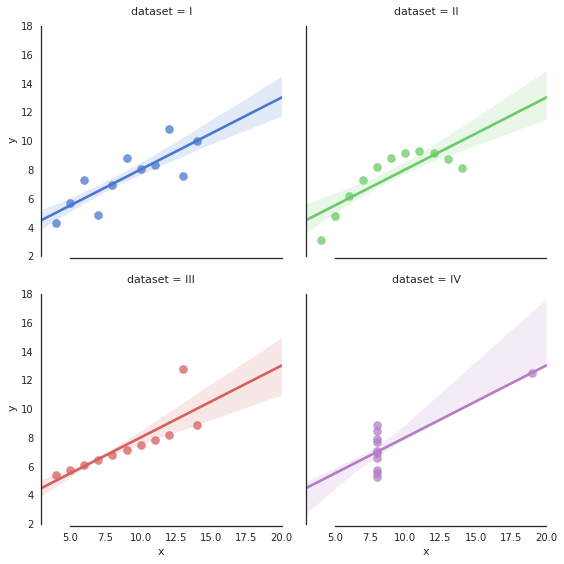

In [11]:
# Plot the four data sets in a two by two array.
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=adf, 
           fit_reg=True, ci = 68, col_wrap=2, palette='muted', 
           size=4, scatter_kws = {'s': 75, 'alpha': 0.75})

#clean up plot
sns.despine(trim=True)

-----

### The Importance of Visualization

As the previous figure demonstrates, simply trusting descriptive statistics (including the mean, standard deviation, or correlation measures) can be deceptive. Visualization can easily provide confirmation or refutation of an intuitive feeling based solely on descriptive statistics. Other, more recent, examples that demonstrate the importance of visualizing data include the [_DrawMyData_][dmd] website that allows you to construct a data set visually with specific statistical values and subsequently download the data as a CSV file. This was used to create a [_datasaurus_][ds], which provides an interesting data visualization. More powerful techniques have also been produced recently that create newer versions of [Anscombe's quartet computationally][aqc].

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to compute the Pearson and Spearman correlation coefficients for the second and third data sets in Anscombe's quartet. Do your values match the values computed for the first data set? What does this imply about these data sets and the importance of visually exploring your data?

-----
[dmd]: http://robertgrantstats.co.uk/drawmydata.html
[ds]: http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html
[aqc]: https://www.autodeskresearch.com/publications/samestats

## Estimating Model Parameters

To this point, we have seen how to compute and visually display a simple linear regression; but since we have not directly computed the linear model, we are unable to apply the model to new, unseen data. In this section, we now turn to the actual computation of the model parameters. Formally, our simple linear model relates the independent variables $x_i$ to the dependent variables $y_i$ in our data set via two parameters: an intercept and a slope. Mathematically, we express this relation in the following form:

$f(x_i) = \beta * x_i + \alpha + \epsilon_i$

where $\epsilon_i$ accounts for the difference between the model and the data for each data point $(x_i, y_i)$. If we have a perfect linear model, these errors, $\epsilon_i$, are all zero. In real life, however, the error terms rarely vanish, because even if the original relationship is perfect, noise creeps into the measurement process. 

At this point, our goal is simple. We wish to determine the model parameters: $\beta$, and $\alpha$ that minimize the values of $\epsilon_i$. We could perform this process in an iterative manner, trying different values for the model parameters and measuring the error function. This approach is often used in machine learning, where we define a **loss function** that we seek to minimize by selecting the best model parameters. In the case of a simple linear model, we have several potential loss functions that could define our errors:

1. _l1-norm_: $\epsilon_i = \left| \ y_i - f(x_i) \ \right|$
1. _l2-norm_: $\epsilon_i = \left( \ y_i - f(x_i) \ \right)^2$

where $f(x_i)$ is defined by our model parameters. In this approach, we look to minimize the sum of these model residuals, which is done by finding the best model parameters: $\hat{\beta}$, and $\hat{\alpha}$. 

In this simple model, we actually can [directly compute][wslr] these parameters by choosing the second loss function (l2-norm) and taking the first derivative of $f(x)$ with respect to our model parameters to minimize the difference. This results, after some algebra, in the following best estimates for our model parameters:

$$ \hat{\beta} = \frac{\sum_i (x_i - \mu_x) (y_i - \mu_y)}{\sum_i (x_i - \mu_x)^2} =
\frac{\textrm{Cov}(x, y)}{\textrm{Var}(x)}$$

and 

$$ \hat{\alpha} = \mu_y - \hat{\beta} \mu_x $$
where $\mu_x$ and $\mu_y$ represent the mean values of x and y, respectively.

We demonstrate this calculation in the following code cell, where we vectorize the operations over our array data by using NumPy functions. We also compute the Pearson's r correlation coefficient, which is related to the estimate of the slope of our simple model:

$$r = \frac{\sum_i (x_i - \mu_x) (y_i - \mu_y)}{\sum_i (x_i - \mu_x) \sum_j (y_j - \mu_y)} 
= \frac{\textrm{Cov}(x, y)}{\sigma_x \sigma_y} = \hat{\beta} \ \frac{\sigma_x}{\sigma_y}$$

-----
[wslr]: https://en.wikipedia.org/wiki/Simple_linear_regression

In [12]:
# Number of data points
n = x.shape[0]

# Determine mean values
mux = np.mean(x)
muy = np.mean(y)

# Determine best fit model parameters (from simple learn regression)
beta = np.sum((x - mux) * (y - muy)) / np.sum((x - mux)**2)
alpha = muy - beta * mux

# Compute Pearson's r correlation coefficient
r = beta * np.std(x)/np.std(y)

# Display results
print(f'Best fit line: y = {beta:4.2f} x + {alpha:5.3f}')
print(f'Pearsonr correlation = {r:5.3f}')

Best fit line: y = 0.50 x + 3.000
Pearsonr correlation = 0.816


-----

Given the model parameters, we can now plot our data, the residual terms, and our best fit model. The following code cell completes these tasks by first using the [`regplot`][srp] function to plot the data. We plot our model residuals as a series of vertical lines and label several of the more prominent residuals to demonstrate the different components in the model construction. Finally, we plot the best fit model by creating new independent variables and using the linear model to specify the corresponding dependent variables (via interpolation in this case). As expected, the linear model visually agrees with the earlier model shown by using the Seaborn [`lmplot`][slp].

-----
[slp]: http://seaborn.pydata.org/generated/seaborn.lmplot.html
[srp]: http://seaborn.pydata.org/generated/seaborn.regplot.html

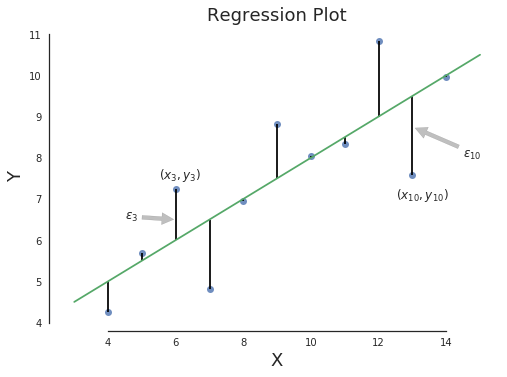

In [13]:
# Plot the data as a Regression Plot
ax = sns.regplot(x='x', y='y', data=adfi, fit_reg=False)

# Label plot
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_title('Regression Plot', fontsize=18)

# Compute and draw epsilons
fy = beta * x + alpha
ax.vlines(x, y, fy)

# Annotate third point
ax.annotate(r'$(x_3, y_3)$', xy=(6, 7), xytext=(5.5, 7.5))

ax.annotate(r'$\epsilon_3$', xy=(6, 6.5), xytext=(4.5, 6.5),
            arrowprops=dict(facecolor='black', alpha =0.25, shrink = 0.05))

# Annotate tenth point
ax.annotate(r'$(x_{10}, y_{10})$', xy=(13, 7.5), xytext=(12.5, 7.0))

ax.annotate(r'$\epsilon_{10}$', xy=(13, 8.75), xytext=(14.5, 8.0),
            arrowprops=dict(facecolor='black', alpha =0.25, shrink = 0.05))

# Compute and plot linear model
xx = np.arange(3, 16)
yy = beta * xx + alpha
ax.plot(xx, yy)

sns.despine(offset = 5, trim=True)

## Visual Explanation of Sum of Squares

A popular statistic that is used to quantify the accuracy of a linear model fit is the [_Coefficient of Determination_][wcd], written as $R^2$, which measures the amount of the variance in the dependent variable ($y$) that is predictable from the independent variables ($x$). In our simple linear model, the square of the Pearson's r correlation coefficient is equivalent to the coefficient of determination, and thus this value is written as $r^2$ when this is true.

We can, in general, define the coefficient of determination as

$$R^2 = 1 - \frac{\sum_i (y_i - f(x_i))^2}{\sum_i (y_i - \mu_y)^2} = 1 - \frac{\sum_i \epsilon_i^2}{\sum_i (y_i - \mu_y)^2} $$

The numerator is the residual sum of squares, and the denominator is the total sum of squares, which is related to the variance of the data. This latter ratio is also known as the fraction of unexplained variance, which is demonstrated visually in the [following figure][wcdf] from Wikipedia. Visually, the numerator measures the difference between the model and the training data (shown in blue in the right hand panel of the following figure), while the denominator measures the difference between the model and the average y value (shown in red in the left hand panel of the following figure). The coefficient of determination is one minus the ratio of the sum of the blue squares to the sum of the red squares. Ideally the coefficient of determination is as close to unity as possible, which happens as either the residual sum of squares goes to zero, or as the total sum of squares grows large.

![Coefficient of Determination](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/640px-Coefficient_of_Determination.svg.png)

----

[wcd]: https://en.wikipedia.org/wiki/Coefficient_of_determination
[wcdf]: https://commons.wikimedia.org/wiki/File:Coefficient_of_Determination.svg

### Computing a Simple Linear Model

We can also compute the simple linear model to these data by using standard functions available in our Python data science modules. We demonstrate this in the following three code cells, where we 

1. Use basic NumPy linear algebra, via the [`lsqtsq`][wlsq] function, to solve for the ordinary least squares result.
2. Use the NumPy polynomial fitting function [`polyfit`][pf] to fit the best one-dimensional polynomial (i.e., a linear model) to solve for the simple linear model.
3. Use the [`linregress`][slr] linear regression function in the SciPy module to perform a linear regression on our data.

Notice that all three techniques generate model fits that are in agreement. In the rest of this notebook, we will use the last technique to perform simple linear regression since it is simple and automatically provides the Pearson's r correlation coefficient.

-----

[wlsq]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
[pf]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
[slr]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [14]:
# Solve general model Ax = y
A = np.vstack([x, np.ones(len(x))]).T

# extract our two parameter model
m, b = np.linalg.lstsq(A, y)[0]

# Display results
print(f'Best fit line: y = {m:4.2f} x + {b:5.3f}')

Best fit line: y = 0.50 x + 3.000


In [15]:
# Compute directly from numpy fitting
p = np.polyfit(x, y, deg=1, cov=False)

# Display results
print(f'Best fit line: y = {p[0]:4.2f} x + {p[1]:5.3f}\n')

Best fit line: y = 0.50 x + 3.000



In [16]:
# Perform simple linear regression
from scipy import stats as sts

# Compute our slope, intercept, and r value
slope, intercept, r_value, p_value, slope_std_error = sts.linregress(x, y)

# Display results
print(f'Best fit line: y = {slope:4.2f} x + {intercept:5.3f}\n')
print(f'Pearsonr correlation = {r_value:5.3f}')

Best fit line: y = 0.50 x + 3.000

Pearsonr correlation = 0.816


-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to compute the ordinary linear regression for the second and third data sets in Anscombe's quartet. Pick one of these data sets and plot the data (via the Seaborn `regplot` function) and your linear model. Does the model match what is shown early when the data and best fit line were plotted directly by Seaborn (via the `lmplot`)?

-----

----

### Using Linear Models

To this point, we have built linear models, displayed them visually, and even used them to predict new dependent data (via interpolation). One other important uses for linear models is to compare data sets in order to test hypothesis. For example, if a data set can be differentiated by some third, potentially categorical, variable, we can explore the difference between linear models fit to subsets of the original data.

As a specific example, we can perform model fits to the _tips_ data set within the Seaborn module. Specifically, we can build a linear model to predict a `tip` given a `total_bill`, which of course would be of interest to those working at the restaurant. In the following code cell, we first load the _tips_ data set before extracting the `total_bill` feature and `tip` feature as one-dimensional arrays. We next use the `linregress` method in the Scipy module to construct a simple linear model to predict the dependent `tip` feature from the independent `total_bill` feature. Finally, we display the fit and Pearson's r correlation value, which indicates a mild correlation. From the fit, we see that for every \$1 increase in our bill, the tip increases by eleven cents (well below the recommended tipping rate).

-----



In [17]:
# Load Data Set
tdf = sns.load_dataset('tips')

# Extract one-dimensional arrays for our features
x = tdf.total_bill.as_matrix()
y = tdf.tip.as_matrix()

# Compute linear model
slope, intercept, r_value, p_value, slope_std_error = sts.linregress(x, y)

# Display Results
print(f'Best fit line: y = {slope:4.2f} x + {intercept:5.3f}')
print(f'Pearsonr correlation = {r_value:5.3f}\n')

Best fit line: y = 0.11 x + 0.920
Pearsonr correlation = 0.676



-----

At this point, we can ask if this formula depends on whether the bill is for a _lunch_ or a _dinner_ meal. To test if the time of day matters, we can extract the original two features: `total_bill`, and `tip` separately for lunch and dinner by masking the DataFrame on the value of the categorical `time` feature. In this approach, we extract two sets of arrays, one for lunch and dinner, construct linear models separately for each data set, and display the linear model and correlation value. This hypothesis is tested, as outlined, in the following code cell.

-----

In [18]:
# Extract lunch features
lx = tdf[tdf.time == 'Lunch'].total_bill.as_matrix()
ly = tdf[tdf.time == 'Lunch'].tip.as_matrix()

# Extract dinner features
dx = tdf[tdf.time == 'Dinner'].total_bill.as_matrix()
dy = tdf[tdf.time == 'Dinner'].tip.as_matrix()

# Fit lunch linear model and display result
slope, intercept, r_value, p_value, slope_std_error = sts.linregress(lx, ly)
print(f'Lunch best fit line: y = {slope:4.2f} x + {intercept:5.3f}')
print(f'Pearsonr correlation = {r_value:5.3f}\n')

# Fit dinner linear model and display result
slope, intercept, r_value, p_value, slope_std_error = sts.linregress(dx, dy)
print(f'Dinner best fit line: y = {slope:4.2f} x + {intercept:5.3f}')
print(f'Pearsonr correlation = {r_value:5.3f}')

Lunch best fit line: y = 0.13 x + 0.567
Pearsonr correlation = 0.805

Dinner best fit line: y = 0.10 x + 1.035
Pearsonr correlation = 0.633


----

From the statistical analysis, we see two things:

1. The slope for the _lunch_ data is higher, indicating that on average an increase in the total bill for a _lunch_ will result in a higher tip than for a similar _dinner_, and
2. The correlation is much stronger for _lunch_ than for _dinner_.

Thus, we expect lunch to have a tighter correlation with smaller residuals than dinner. At this point, a visual inspection should be performed to confirm (or refute) this statistical result. The following code cell generates linear models for lunch and dinner separately by using the `lmplot` function within the Seaborn module. As expected from the statistical analysis, we see that lunch has a tighter correlation with smaller residuals and that dinner has a shallower slope and higher variability in the residuals.

-----

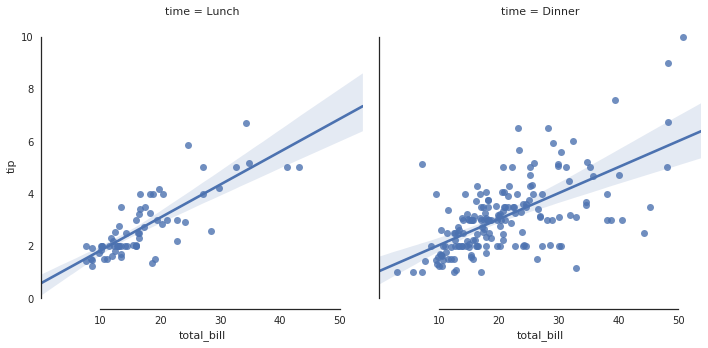

In [19]:
# Compute and plot a linear model to the tips data 
# distinguished by the time of day feature
sns.lmplot(x="total_bill", y="tip", col="time", data=tdf, palette='muted')

# Clean plot
sns.despine(trim = True)

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to compute linear models for the _tips_ data set, but split by day of the week. Which day has the highest model slope? Which day has the smallest model slope? Plot both of these and interpret why that might be the case. Also, do these values depend on the time of day (i.e., lunch or dinner)?

-----

-----

## Non-linear Example

While the name _linear regression_ seems to imply that only linear functions can be used to construct models, that is not the case. The term linear refers to the parameters determined by the technique, not the variables themselves. We can demonstrate this by creating an artificial, non-linear example and computing a linear and non-linear model from the resulting data.

For this purpose, we will construct a compounding interest data set, for which the growth of the principal is non-linear. In the following code cell, we define an initial deposit, interest rate, and duration (in years). The principal is accumulated over the duration, with interest added once a year, and the accumulating sum is displayed every five years.

-----

In [20]:
# Define our initial values
initial_deposit = 10000
int_rate = 0.075
duration = 30

yrs = np.arange(1, duration + 1)
value = np.zeros(yrs.shape[0])

sum = initial_deposit

print('Year\tAmount')
print(20*'-')

for idx, yr in enumerate(yrs):
    sum += int_rate * sum
    value[idx] = sum
    
    if idx % 5 == 4:
        print(f'{yr}\t{sum:8.2f}')

Year	Amount
--------------------
5	14356.29
10	20610.32
15	29588.77
20	42478.51
25	60983.40
30	87549.55


-----

Given these data, we can now regress our best fit linear model as before. In this case, we use the `linregress` function in the SciPy stats module. We also transform the independent variable (`values`) to log-space, and compute the best fit linear model in log-space using the same function. For each case, we display the best fit linear model and the Pearson R correlation measure. While the linear model provides a good fit over shorter time scales (< 30 years), the non-linear model provides a perfect fit since the compounding interest example is linear in log-space.

-----

In [21]:
x = np.arange(1, yrs.shape[0] + 2, 2)

# Compute Regular Regression
slope, intercept, r_value, pv, sse = sts.linregress(yrs, value)
y = slope * x + intercept

print('\nRegular Regression:')
print(f'Best fit line: y = {slope:4.2f} x + {intercept:5.3f}')
print(f'Pearsonr correlation = {r_value:5.3f}')

# Compute Logarithmic regression
slope, intercept, lr_value, pv, sse = sts.linregress(yrs, np.log10(value))
ly = slope * x + intercept

print('\nLogarithmic Regression:')
print(f'Best fit line: y = {slope:4.2f} x + {intercept:5.3f}')
print(f'Pearsonr correlation = {lr_value:5.3f}')


Regular Regression:
Best fit line: y = 2490.23 x + -1547.174
Pearsonr correlation = 0.964

Logarithmic Regression:
Best fit line: y = 0.03 x + 4.000
Pearsonr correlation = 1.000


-----

This result can also be displayed graphically, by plotting both the data and the best fit model. The following code cell does this, first for the best linear model, second for the best non-linear model in logarithmic space (where the model is linear), and finally, the same non-linear model transformed back into linear space. The strong agreement shown between the best non-linear model and the data is clearly evident.

-----

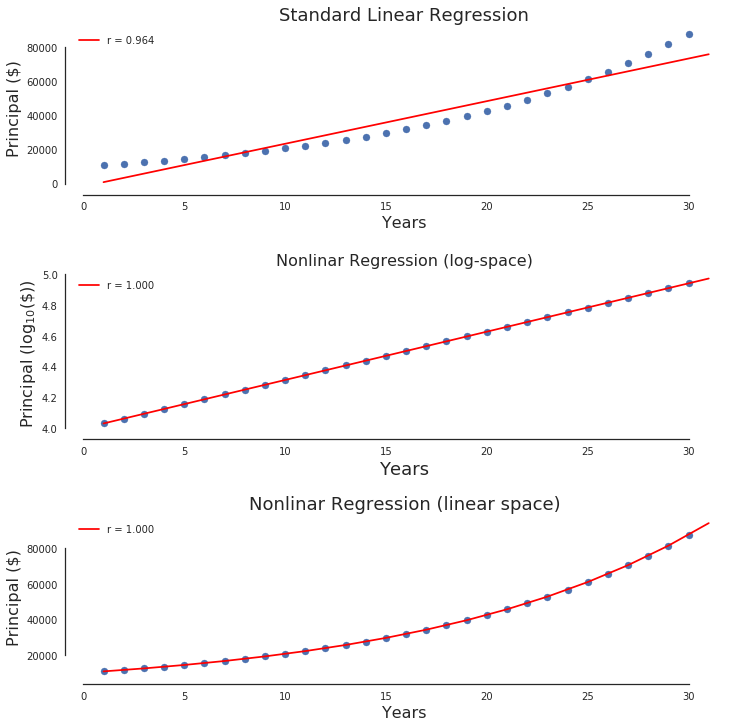

In [22]:
# Now we create our figure and axes for the plot we will make.
fig, axs = plt.subplots(figsize=(12, 12), nrows=3, ncols=1, sharex=True)
adj = plt.subplots_adjust(hspace=0.5)

# Plot standard linear regression
axs[0].set_xlabel('Years', fontsize=16)
axs[0].set_ylabel('Principal ($)', fontsize=16)
axs[0].set_title('Standard Linear Regression', fontsize=18)

# Plot data and regression
axs[0].scatter(yrs, value)
axs[0].plot(x, y, label=f'r = {r_value:4.3f}', c='r')
axs[0].legend()

# Plot non-linear regression in log space
axs[1].set_xlabel('Years', fontsize=18)
axs[1].set_ylabel(r'Principal ($\log_{10}(\$)$)', fontsize=16)
axs[1].set_title('Nonlinar Regression (log-space)', fontsize=16)

# Plot data and regression
axs[1].scatter(yrs, np.log10(value))
axs[1].plot(x, ly, label=f'r = {lr_value:4.3f}', c='r')
axs[1].legend()

# Transform logarithmic model to linear space
nly = np.power(10, ly)

# Plot non-linear regression in linear space
axs[2].set_xlabel('Years', fontsize=16)
axs[2].set_ylabel('Principal ($)', fontsize=16)
axs[2].set_title('Nonlinar Regression (linear space)', fontsize=18)

# Plot data and regression
axs[2].scatter(yrs, value)
axs[2].plot(x, nly, label=f'r = {lr_value:4.3f}', c='r')
axs[2].legend()

# Clean up plots
sns.despine(offset=5, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>

Modify the initial conditions in the previous three code cells to change the initial deposit, interest rate, and duration. Compare the quality of regressions (both standard and logarithmic) as the duration increases or the rate changes.

-----

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. Wikipedia has an excellent discussion on [simple linear regression][1].
2. Wikipedia also has a nice discussion on the [coefficient of determination][2].
3. The original paper by F.J. Anscombe on the importance of [Graphs in Statistical Analysis][3] is insightful.
4. The [DrawMyData][4] website is useful for creating data sets with specific statistics.
5. A [simple introduction][5] to simple linear regression and correlation

-----

[1]: https://en.wikipedia.org/wiki/Simple_linear_regression
[2]: https://en.wikipedia.org/wiki/Coefficient_of_determination
[3]: http://www.jstor.org/stable/2682899?seq=1#page_scan_tab_contents
[4]: http://robertgrantstats.co.uk/drawmydata.html
[5]: http://www.mathsisfun.com/data/correlation.html